In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [4]:
url = "https://raw.githubusercontent.com/ametoGiscarddEstaing/data-science-stuff/refs/heads/main/euro_2024.csv" # replace for your own filename
df = pd.read_csv(url, index_col=0, encoding='latin', on_bad_lines='skip', sep = ";")
#df = pd.read_csv(filename1, ) # gets the file and saves it in "df1"
#df_raw = pd.read_csv(filename1, encoding='latin', on_bad_lines='skip', sep = ";") # gets the file and saves it in "df1"

In [5]:
df

,version,doi,year,resp_id,country,countrycode,country_alpha2,d3,d4,d4_age,...,meta_end_date,meta_duration,meta_duration2,meta_consent,meta_mode,meta_vmobiledevice,Gen_by_age,Edu_rec,Weight1,Weight2
za_nr,,,,,,,,,,,,,,,,,,,,,
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560556,1,56,BE,2,1954,70,...,2024-06-17,1257,00:20:57,1,1,5,8,1,0.697848,0.734922
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560441,1,56,BE,2,1963,61,...,2024-06-16,1020,00:17:00,1,1,5,8,2,1.264243,1.338579
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560543,1,56,BE,1,1955,69,...,2024-06-17,893,00:14:53,1,1,5,4,3,0.671724,0.594819
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560161,1,56,BE,1,1963,61,...,2024-06-14,890,00:14:50,1,1,3,4,2,1.121143,1.191413
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560871,1,56,BE,2,1982,42,...,2024-06-18,1271,00:21:11,1,1,5,7,3,1.216125,1.117679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7521016,27,752,SE,2,1963,61,...,2024-06-24,709,00:11:49,1,1,3,8,2,1.406337,1.342382
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520797,27,752,SE,2,1992,32,...,2024-06-19,891,00:14:51,1,1,5,6,3,1.103413,1.064219
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520288,27,752,SE,1,1999,25,...,2024-06-17,1192,00:19:52,1,1,1,2,3,0.927830,0.901989


In [6]:
df["d4_age"]

za_nr
8868    70
8868    61
8868    69
8868    61
8868    42
        ..
8868    61
8868    32
8868    25
8868    35
8868    24
Name: d4_age, Length: 25904, dtype: int64

In [7]:
vars = ["country_alpha2", "d8", "d2", "q2",  "q4", "q6", "q6n", "q9_3", "q9_6", "q9_5", "q12_1", "q12_2", "q12_3", "q12_4", "q12_5", "d3", "q17", "q13_6", "q13_8", "d9", "d4_age", "q16", "q10"]

In [8]:
df = df[vars]

In [9]:
df = df.loc[df["country_alpha2"] == "FR"]

In [10]:
df = df.drop("country_alpha2", axis = 1)

In [11]:
col_names = [
    "rural_urban",
    "education",
    "dem_satisfaction",
    "govt_approval",
    "vote_choice_EP",
    "vote_choice_EP_2",
    "vote_prop_lfi",
    "vote_prop_ps",
    "vote_prop_verts",
    "trade", 
    "redistrib", 
    "same_sex",
    "immigration",
    "climate",
    "gender", 
    "self_europe", 
    "politicians",
    "pro_ukraine",
    "religion",
    "age",
    "europe_good_bad",
    "left_right"
]

In [12]:
df.columns = col_names

In [13]:
df = df[df < 97]

In [14]:
old_labels = [1, 2, 3] #good, bad, neither
new_labels = [3, 1, 2] #bad, neither, good


In [15]:
df["europe_good_bad"].value_counts()

europe_good_bad
1.0    437
3.0    300
2.0    215
Name: count, dtype: int64

In [16]:
df["europe_good_bad"] = df["europe_good_bad"].replace(old_labels, new_labels)

In [17]:
df["europe_good_bad"].value_counts()

europe_good_bad
3.0    437
2.0    300
1.0    215
Name: count, dtype: int64

In [18]:
df["left_right"].value_counts()

left_right
5.0     159
10.0    125
8.0      84
6.0      76
7.0      76
2.0      69
3.0      68
4.0      64
9.0      54
0.0      45
1.0      27
Name: count, dtype: int64

In [19]:
df["redistrib"].value_counts()

redistrib
0.0     206
5.0     162
4.0      93
6.0      89
3.0      87
7.0      81
2.0      69
8.0      60
10.0     55
1.0      38
9.0      17
Name: count, dtype: int64

In [20]:
old_red = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
new_red = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
df["redistrib"] = df["redistrib"].replace (old_red, new_red)

In [21]:
old_uk = (1, 2, 3, 4, 5)
new_uk = (5, 4, 3, 2, 1)
df["pro_ukraine"] = df["pro_ukraine"].replace(old_uk, new_uk)

In [45]:
df["same_sex"].value_counts()

same_sex
0.0     335
5.0     148
10.0    144
7.0      60
3.0      53
2.0      45
1.0      44
8.0      44
6.0      43
4.0      38
9.0      17
Name: count, dtype: int64

In [46]:
old_sex = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
new_sex = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)

In [59]:
df["climate"].value_counts()

climate
5.0     218
0.0     130
2.0      98
4.0      92
3.0      86
7.0      84
10.0     71
6.0      71
1.0      44
8.0      44
9.0      26
Name: count, dtype: int64

In [60]:
df["climate"] = df["climate"].replace (old_sex, new_sex)

In [47]:
df["same_sex"] = df["same_sex"].replace (old_sex, new_sex)

In [49]:
df["same_sex"].value_counts()

same_sex
10.0    335
5.0     148
0.0     144
3.0      60
7.0      53
8.0      45
9.0      44
2.0      44
4.0      43
6.0      38
1.0      17
Name: count, dtype: int64

In [23]:
df["left_right"].value_counts()

left_right
5.0     159
10.0    125
8.0      84
6.0      76
7.0      76
2.0      69
3.0      68
4.0      64
9.0      54
0.0      45
1.0      27
Name: count, dtype: int64

In [ ]:
pd.crosstab(df["left_right"], df["vote_prop_ps"])

In [62]:
df2 = df[df["left_right" ]<= 5]

In [ ]:
df2

In [ ]:
df2["redistrib"].value_counts()

In [ ]:
df2["vote_prop_lfi_rec"] = 0

In [ ]:
mask = df2['lfi_vote_prop'] = 0 
df2['age_cat'] = 0
mask = df2['lfi_vote_prop'] = 0 
df2['age_cat'] = 0

In [ ]:
df2["pro_ukraine"].value_counts()

In [ ]:
df["education"].value_counts()

In [ ]:
my_formula = "pro_ukraine  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + age + gender + education"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ukraine.png', bbox_inches='tight')



In [ ]:
my_formula = "self_europe  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + gender + age + education"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('self_europe.png', bbox_inches='tight')


In [ ]:
my_formula = "europe_good_bad  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + gender + age + education"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('europe.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:          vote_prop_lfi   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     13.12
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           4.84e-10
Time:                        20:43:53   Log-Likelihood:                -1066.4
No. Observations:                 397   AIC:                             2143.
Df Residuals:                     392   BIC:                             2163.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8949      1.038     

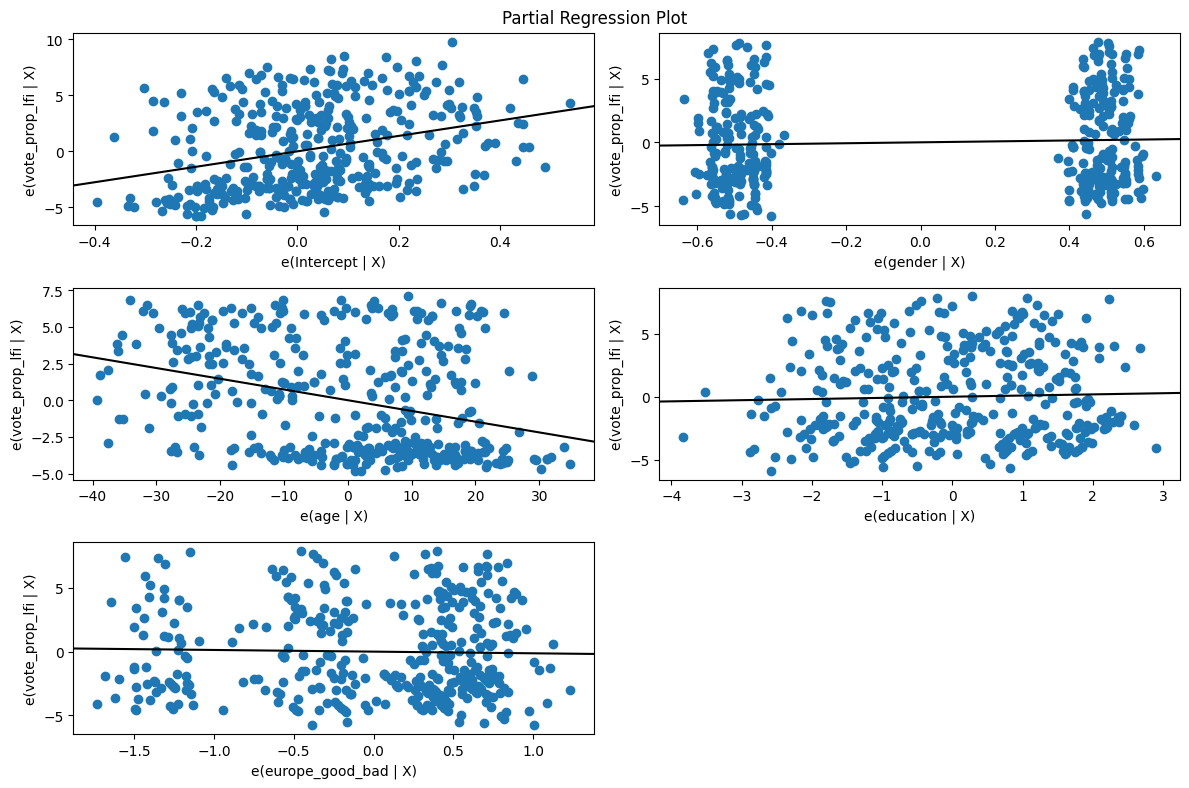

In [ ]:
my_formula = "vote_prop_lfi  ~  gender + age + education + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_europe_df2.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:           vote_prop_ps   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.512
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           6.65e-05
Time:                        20:44:19   Log-Likelihood:                -932.16
No. Observations:                 363   AIC:                             1876.
Df Residuals:                     357   BIC:                             1900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6585      0.954     

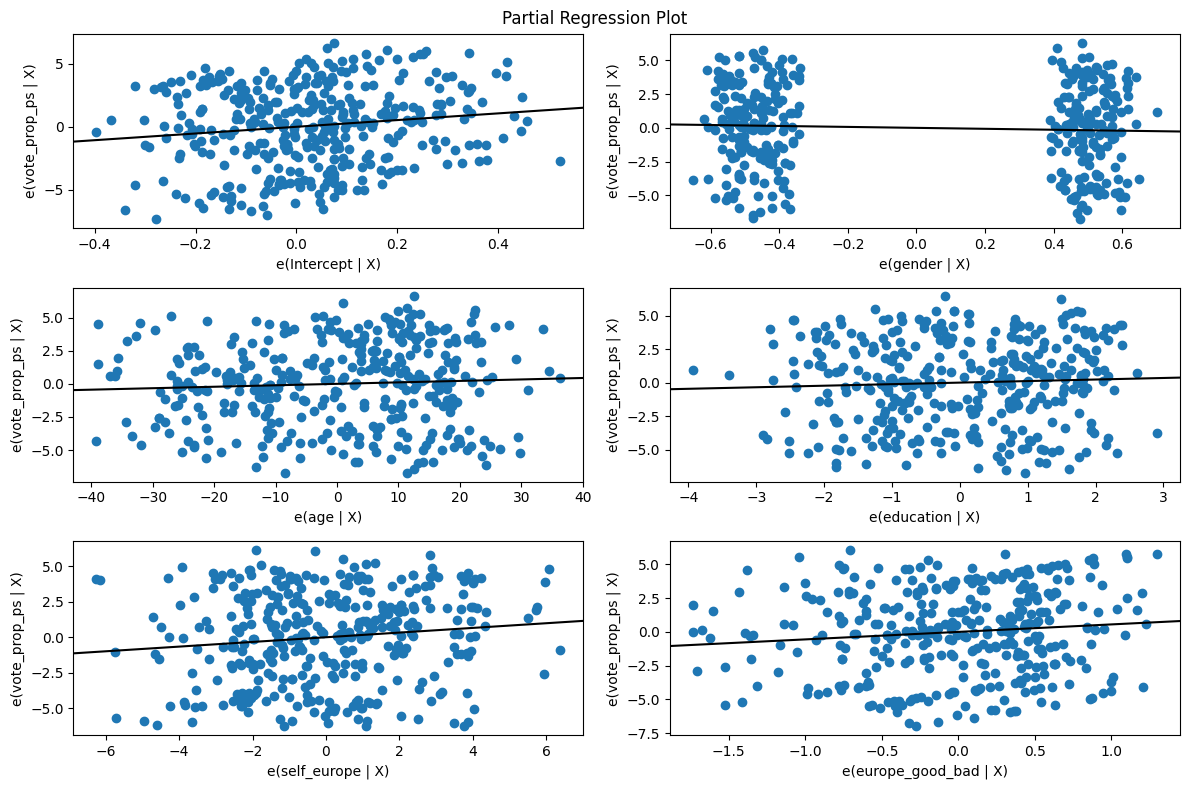

In [38]:
my_formula = "vote_prop_ps  ~  gender + age + education + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_europe_df2.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:        vote_prop_verts   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     6.843
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           4.10e-06
Time:                        20:26:10   Log-Likelihood:                -915.58
No. Observations:                 363   AIC:                             1843.
Df Residuals:                     357   BIC:                             1867.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.3804      0.911     

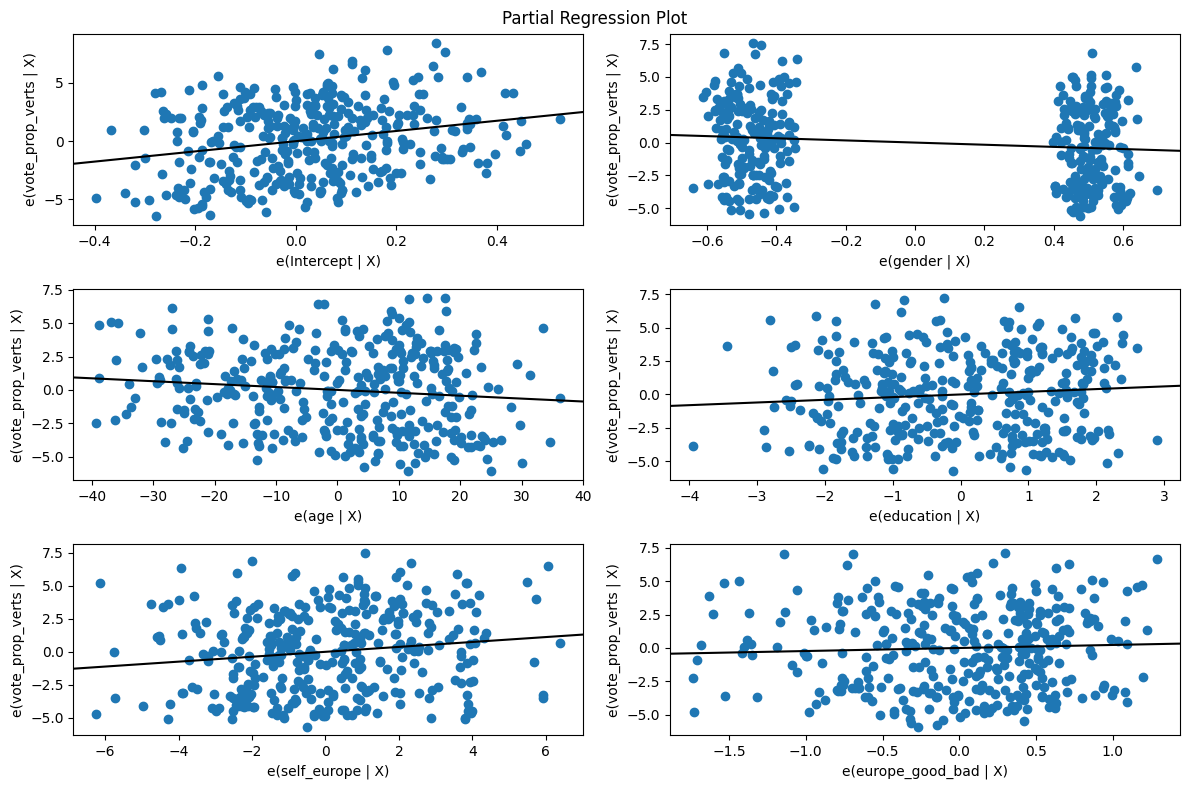

In [34]:
my_formula = "vote_prop_verts  ~  gender + age + education + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_europe_df2.png', bbox_inches='tight')

In [ ]:
my_formula = "vote_prop_lfi  ~  gender + age + education + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_europe_df1.png', bbox_inches='tight')


In [ ]:
my_formula = "vote_prop_ps  ~  gender + age + education + left_right + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_europe_df1.png', bbox_inches='tight')


In [ ]:
my_formula = "vote_prop_ps  ~  gender + age + education + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_europe_df2.png', bbox_inches='tight')


In [ ]:
my_formula = "vote_prop_verts  ~  gender + age + education + self_europe + europe_good_bad"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_europe_df2.png', bbox_inches='tight')


In [ ]:
my_formula = "vote_prop_ps  ~  gender + age + education + same_sex"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('same_sex_df2.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:          vote_prop_lfi   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     12.96
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           6.41e-10
Time:                        20:47:43   Log-Likelihood:                -1064.9
No. Observations:                 398   AIC:                             2140.
Df Residuals:                     393   BIC:                             2160.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.7669      1.057      7.349      

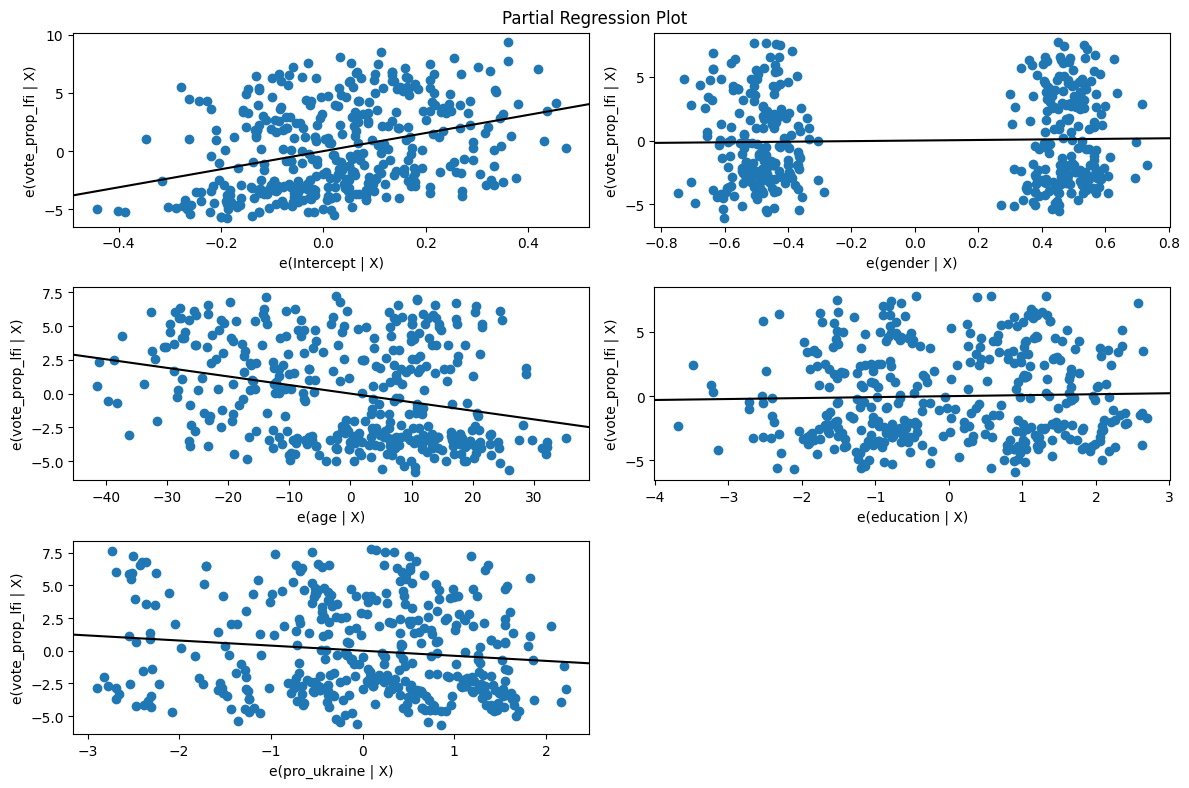

In [39]:
my_formula = "vote_prop_lfi  ~  gender + age + education + pro_ukraine"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_ukraine_df2.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:           vote_prop_ps   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     8.165
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.49e-06
Time:                        20:49:21   Log-Likelihood:                -1007.6
No. Observations:                 394   AIC:                             2025.
Df Residuals:                     389   BIC:                             2045.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9407      0.949      2.044      

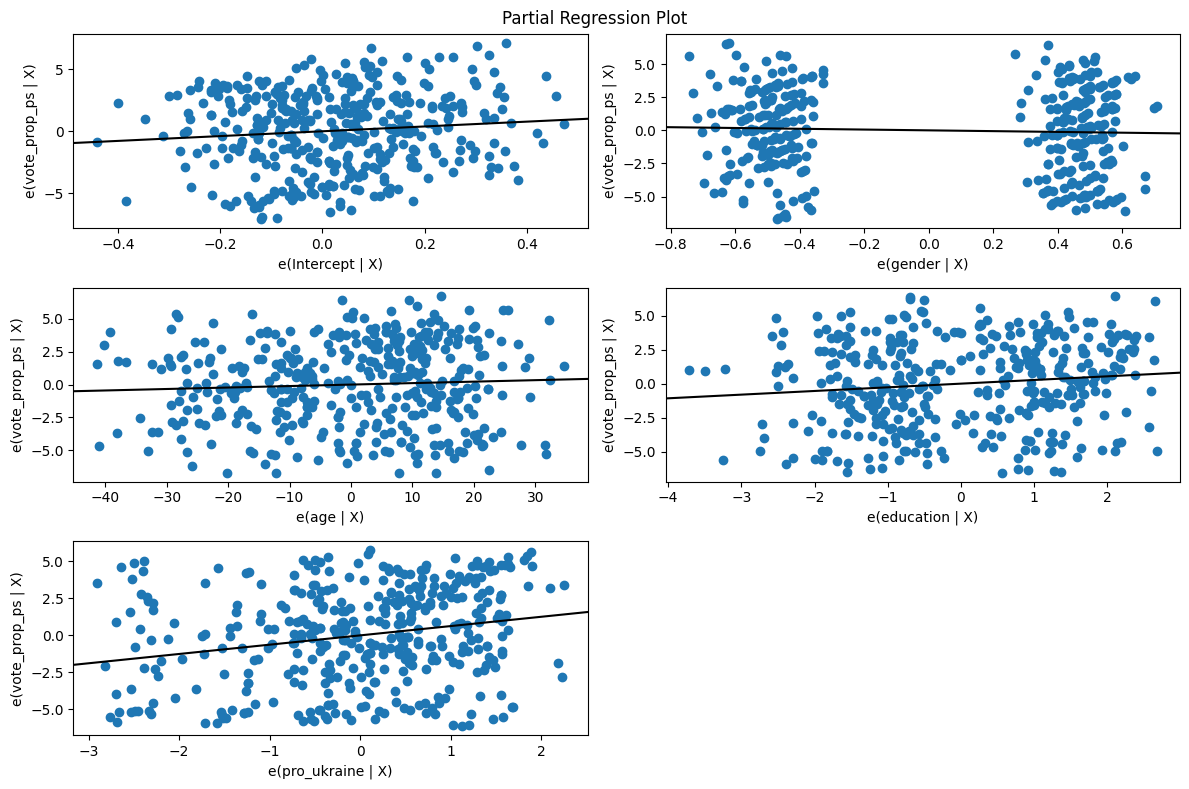

In [40]:
my_formula = "vote_prop_ps  ~  gender + age + education + pro_ukraine"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_ukraine_df2.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:        vote_prop_verts   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     9.582
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.13e-07
Time:                        20:49:46   Log-Likelihood:                -995.01
No. Observations:                 395   AIC:                             2000.
Df Residuals:                     390   BIC:                             2020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2959      0.910      3.623      

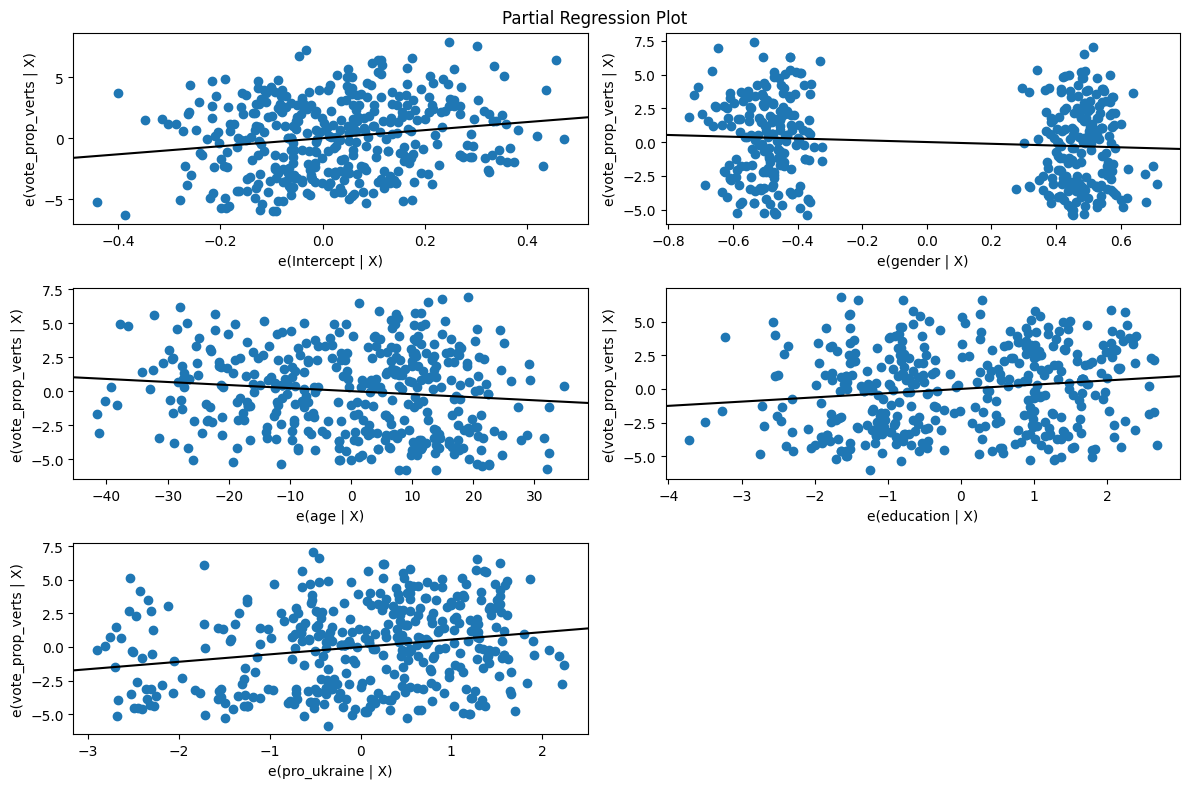

In [41]:
my_formula = "vote_prop_verts ~  gender + age + education + pro_ukraine"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_ukraine_df2.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:          vote_prop_lfi   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     13.71
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.69e-10
Time:                        20:58:16   Log-Likelihood:                -1096.4
No. Observations:                 410   AIC:                             2203.
Df Residuals:                     405   BIC:                             2223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3018      1.032      5.136      0.0

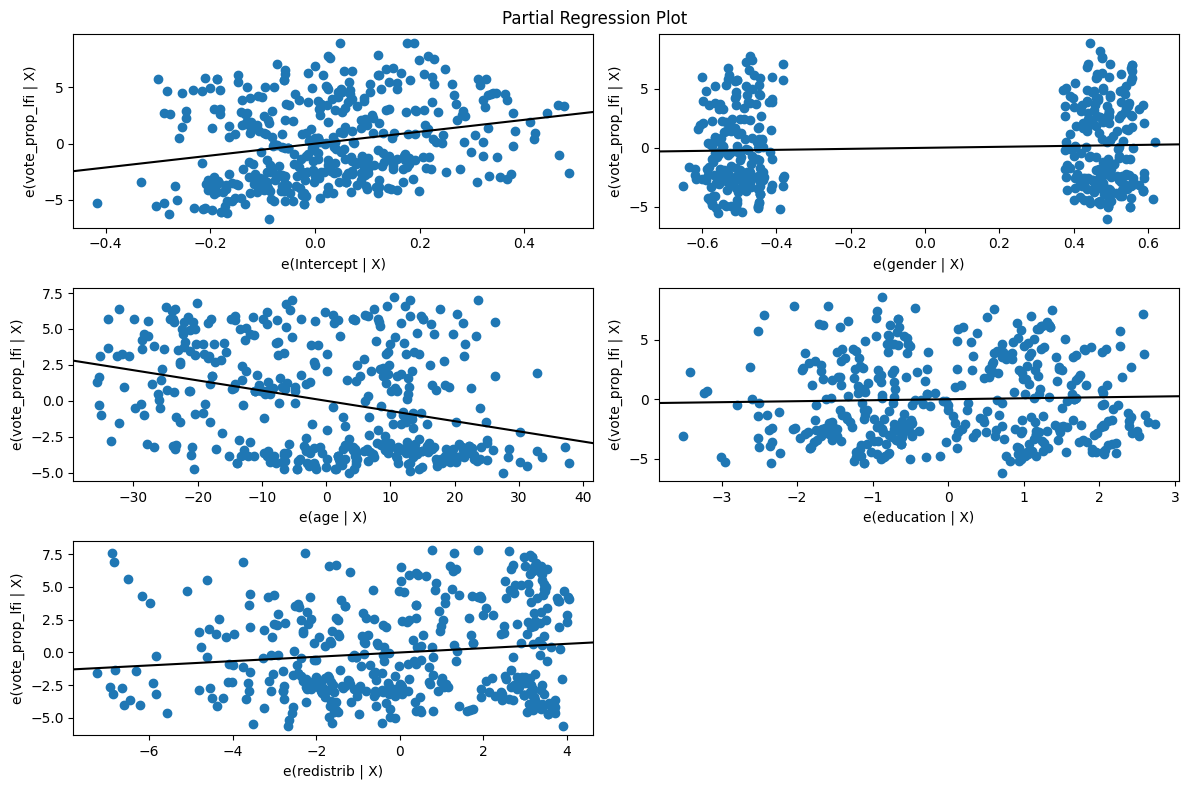

In [42]:
my_formula = "vote_prop_lfi ~  gender + age + education + redistrib"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_econ_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:           vote_prop_ps   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.298
Date:                Wed, 28 Jan 2026   Prob (F-statistic):             0.0112
Time:                        20:58:23   Log-Likelihood:                -1051.2
No. Observations:                 406   AIC:                             2112.
Df Residuals:                     401   BIC:                             2132.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2254      0.959      3.365      0.0

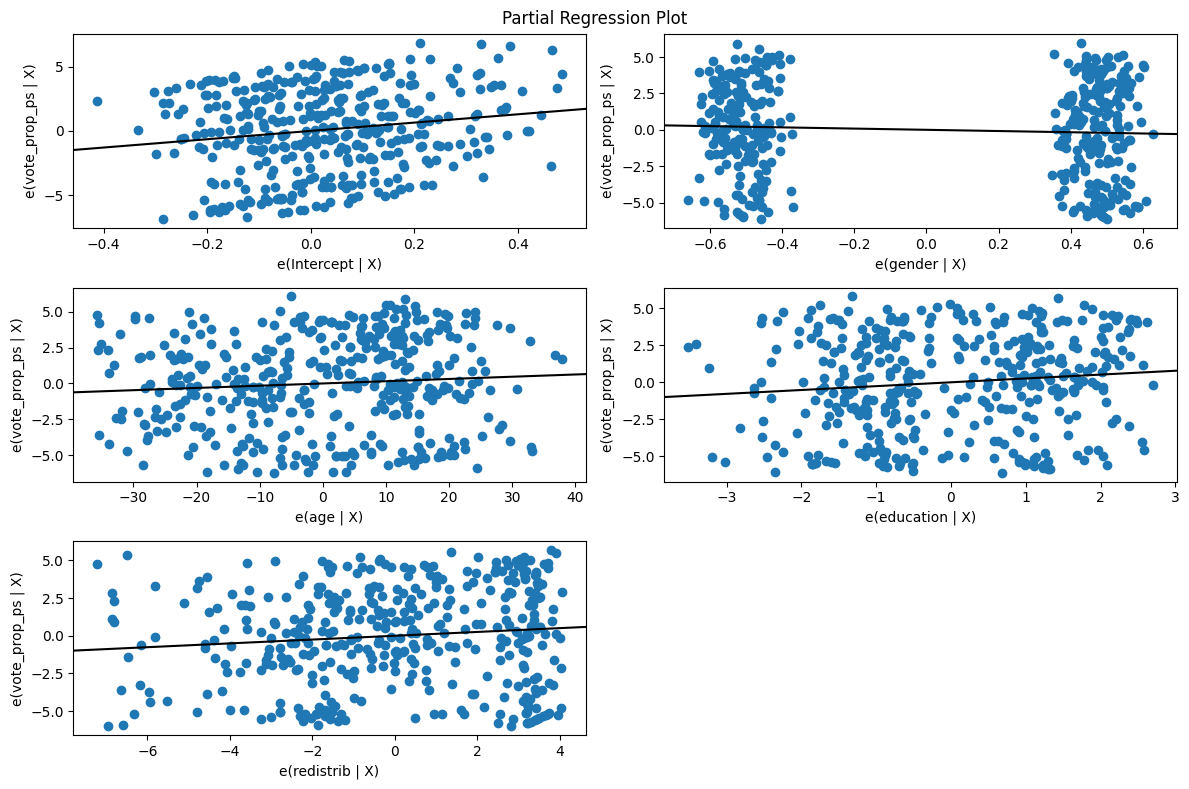

In [43]:
my_formula = "vote_prop_ps ~  gender + age + education + redistrib"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_econ_df2.png', bbox_inches='tight')

                            OLS Regression Results                            
Dep. Variable:        vote_prop_verts   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.842
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           0.000141
Time:                        20:58:30   Log-Likelihood:                -1037.4
No. Observations:                 408   AIC:                             2085.
Df Residuals:                     403   BIC:                             2105.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1067      0.912      4.503      0.0

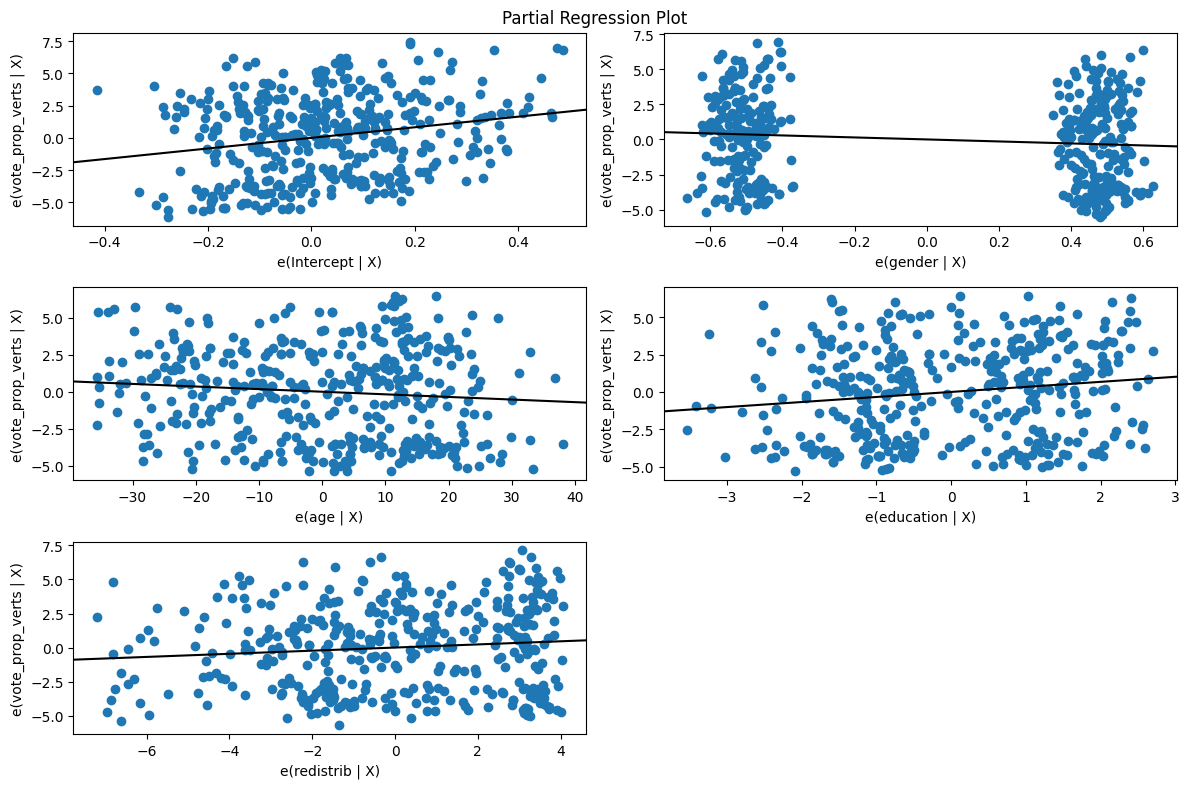

In [44]:
my_formula = "vote_prop_verts ~  gender + age + education + redistrib"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_econ_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:          vote_prop_lfi   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     12.04
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.96e-09
Time:                        21:13:08   Log-Likelihood:                -1102.1
No. Observations:                 411   AIC:                             2214.
Df Residuals:                     406   BIC:                             2234.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7739      0.951      7.120      0.0

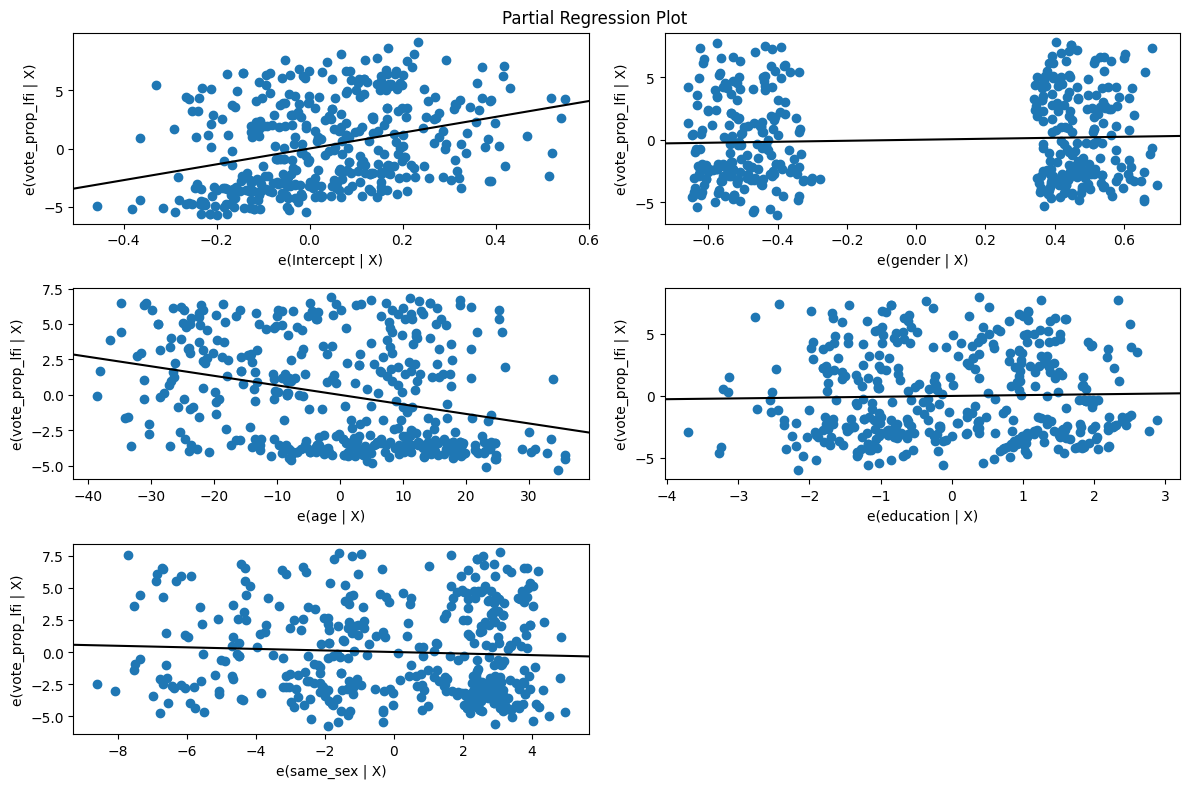

In [51]:
my_formula = "vote_prop_lfi ~  gender + age + education + same_sex"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_sex_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:           vote_prop_ps   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.473
Date:                Wed, 28 Jan 2026   Prob (F-statistic):            0.00151
Time:                        21:13:43   Log-Likelihood:                -1051.7
No. Observations:                 407   AIC:                             2113.
Df Residuals:                     402   BIC:                             2133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5631      0.874      4.077      0.0

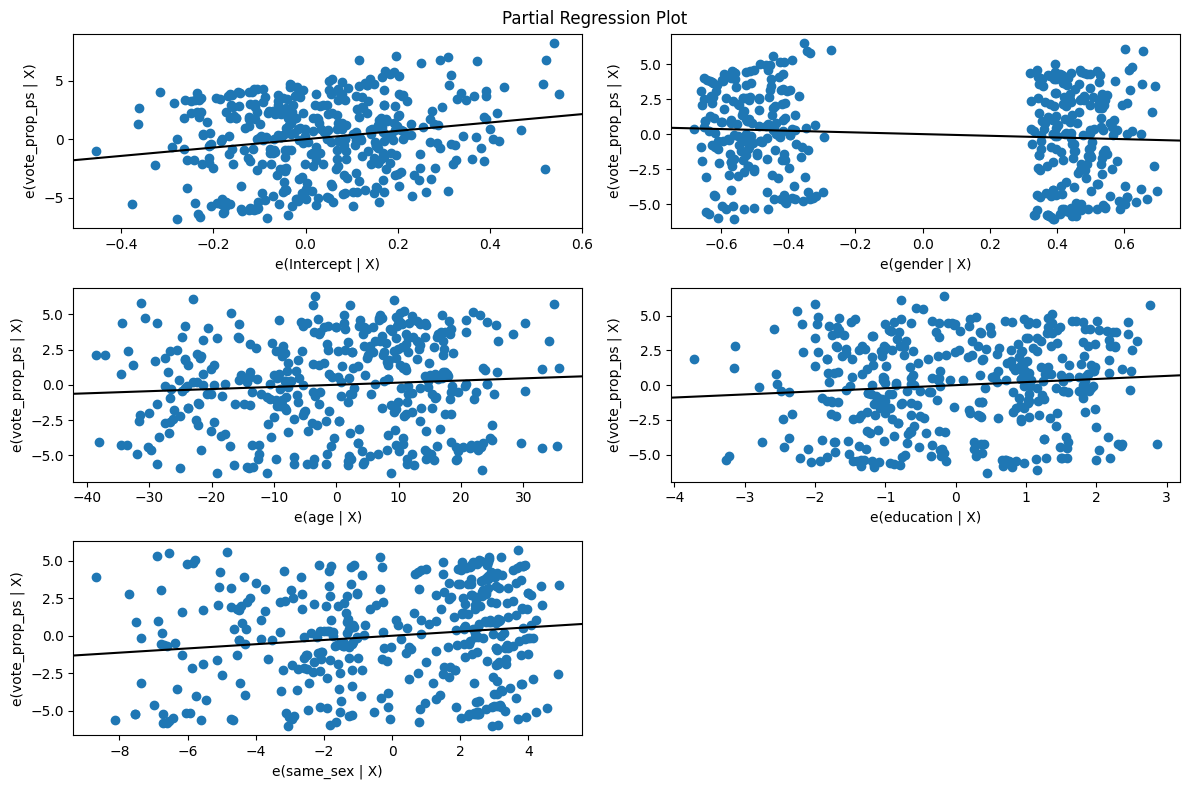

In [52]:
my_formula = "vote_prop_ps ~  gender + age + education + same_sex"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_sex_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:        vote_prop_verts   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.932
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           0.000684
Time:                        21:13:58   Log-Likelihood:                -1041.0
No. Observations:                 409   AIC:                             2092.
Df Residuals:                     404   BIC:                             2112.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0290      0.837      6.007      0.0

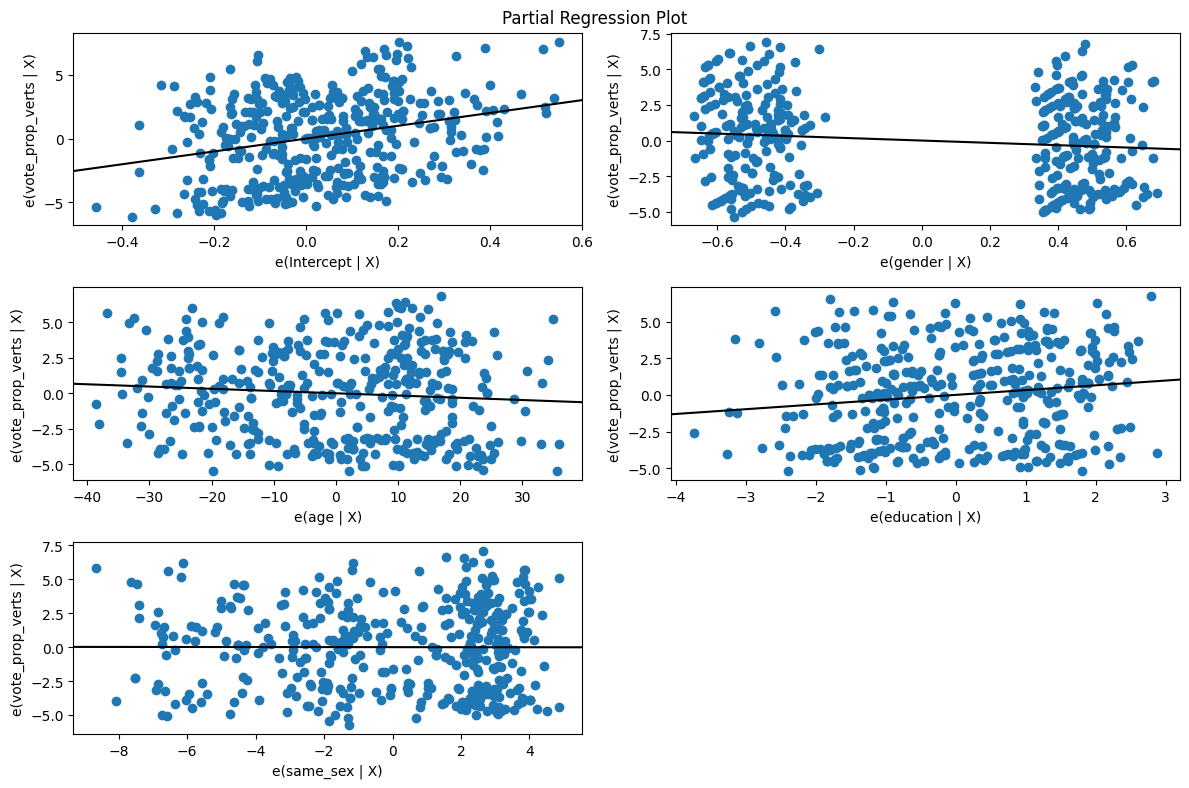

In [53]:
my_formula = "vote_prop_verts ~  gender + age + education + same_sex"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_sex_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:          vote_prop_lfi   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     25.39
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           8.59e-19
Time:                        21:28:03   Log-Likelihood:                -1081.4
No. Observations:                 412   AIC:                             2173.
Df Residuals:                     407   BIC:                             2193.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5263      0.932      4.859      

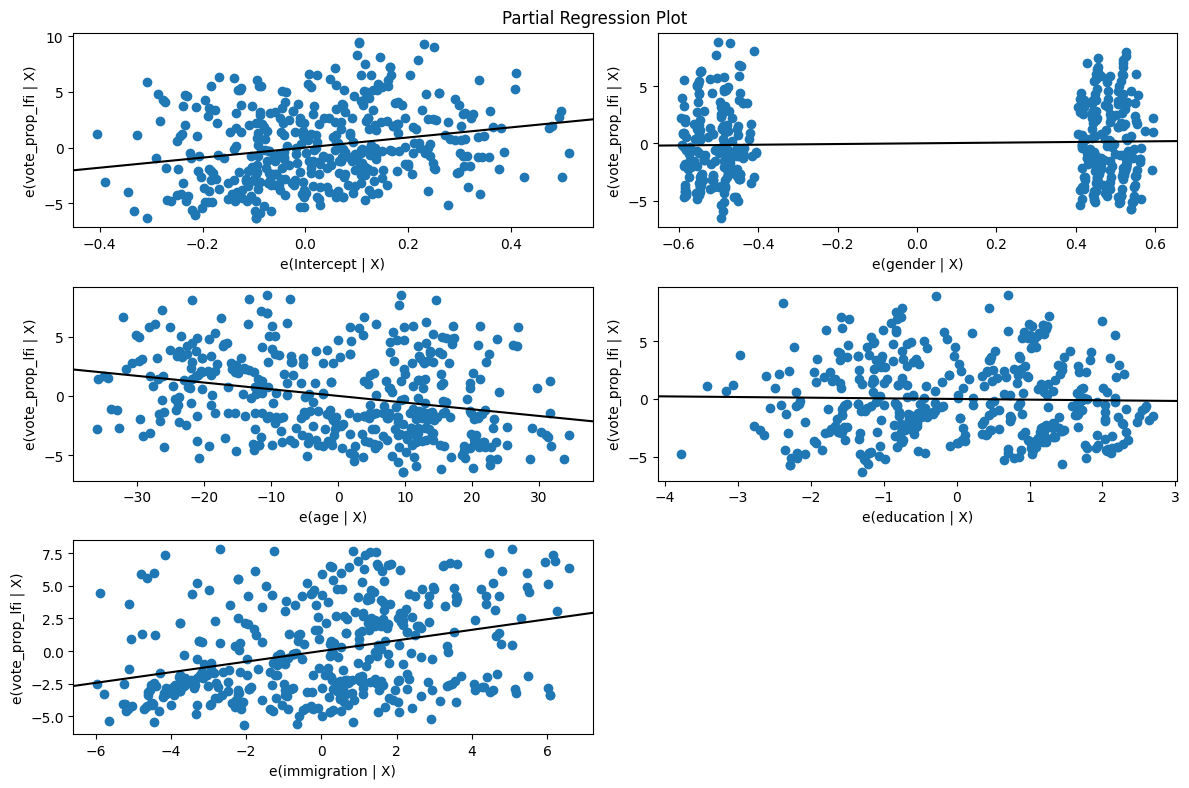

In [54]:
my_formula = "vote_prop_lfi ~  gender + age + education + immigration"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_immigration_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:           vote_prop_ps   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     7.627
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           6.23e-06
Time:                        21:28:30   Log-Likelihood:                -1050.4
No. Observations:                 409   AIC:                             2111.
Df Residuals:                     404   BIC:                             2131.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7115      0.894      3.033      

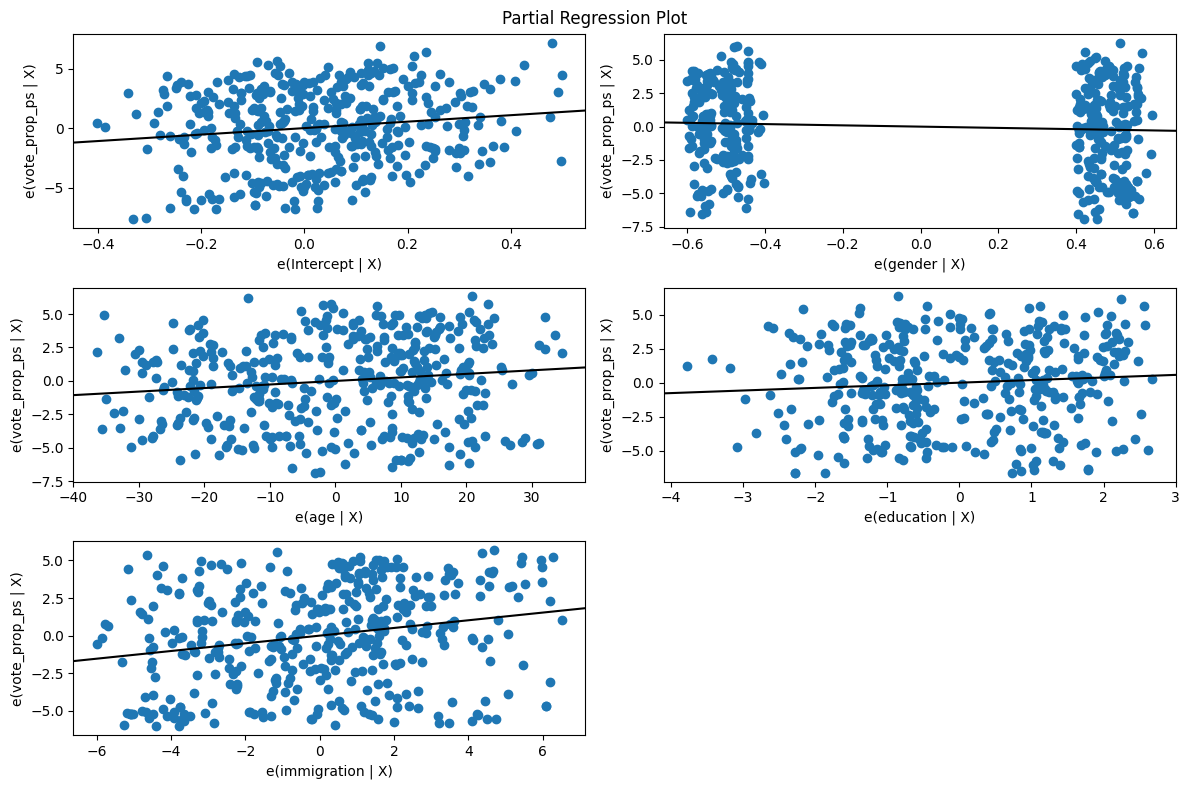

In [56]:
my_formula = "vote_prop_ps ~  gender + age + education + immigration"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_immigration_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:        vote_prop_verts   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     11.24
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.17e-08
Time:                        21:28:47   Log-Likelihood:                -1031.9
No. Observations:                 410   AIC:                             2074.
Df Residuals:                     405   BIC:                             2094.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6042      0.847      4.254      

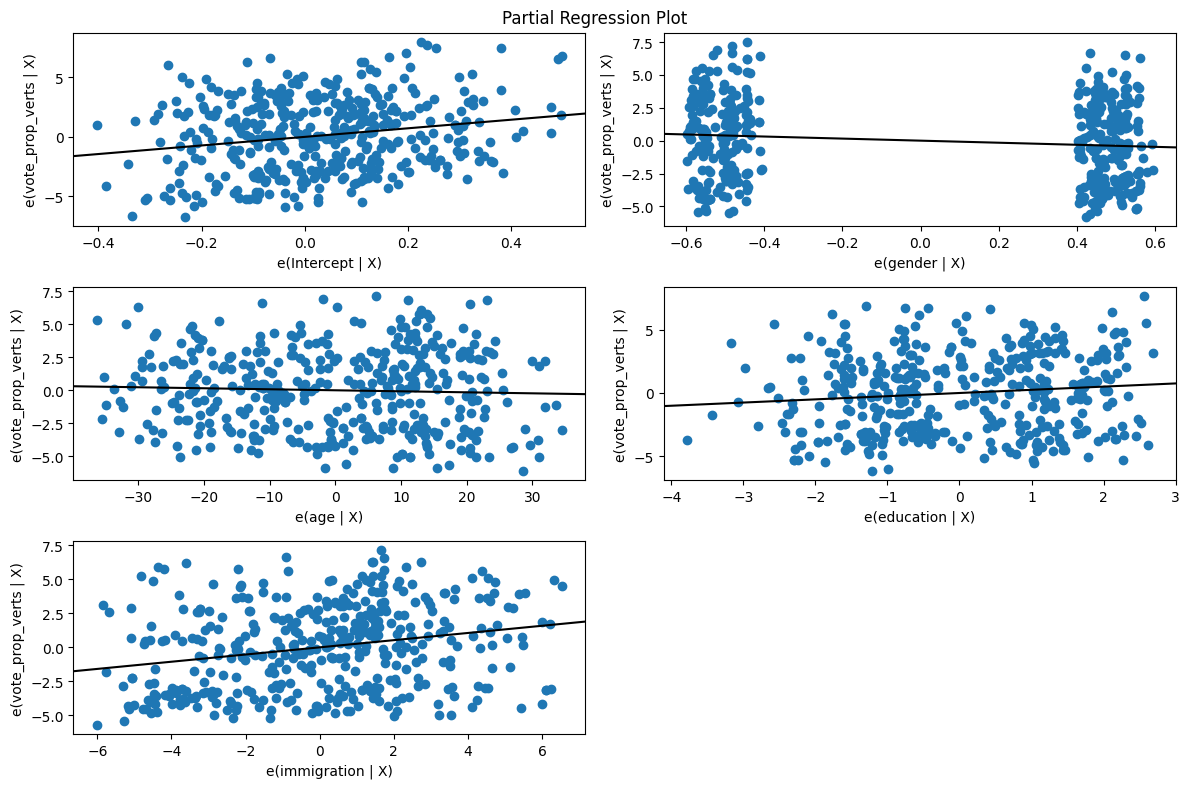

In [58]:
my_formula = "vote_prop_verts ~  gender + age + education + immigration"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_immigration_df2.png', bbox_inches='tight')

                            OLS Regression Results                            
Dep. Variable:          vote_prop_lfi   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.48
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.37e-09
Time:                        22:03:14   Log-Likelihood:                -1106.7
No. Observations:                 413   AIC:                             2223.
Df Residuals:                     408   BIC:                             2243.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1850      0.979      6.320      0.0

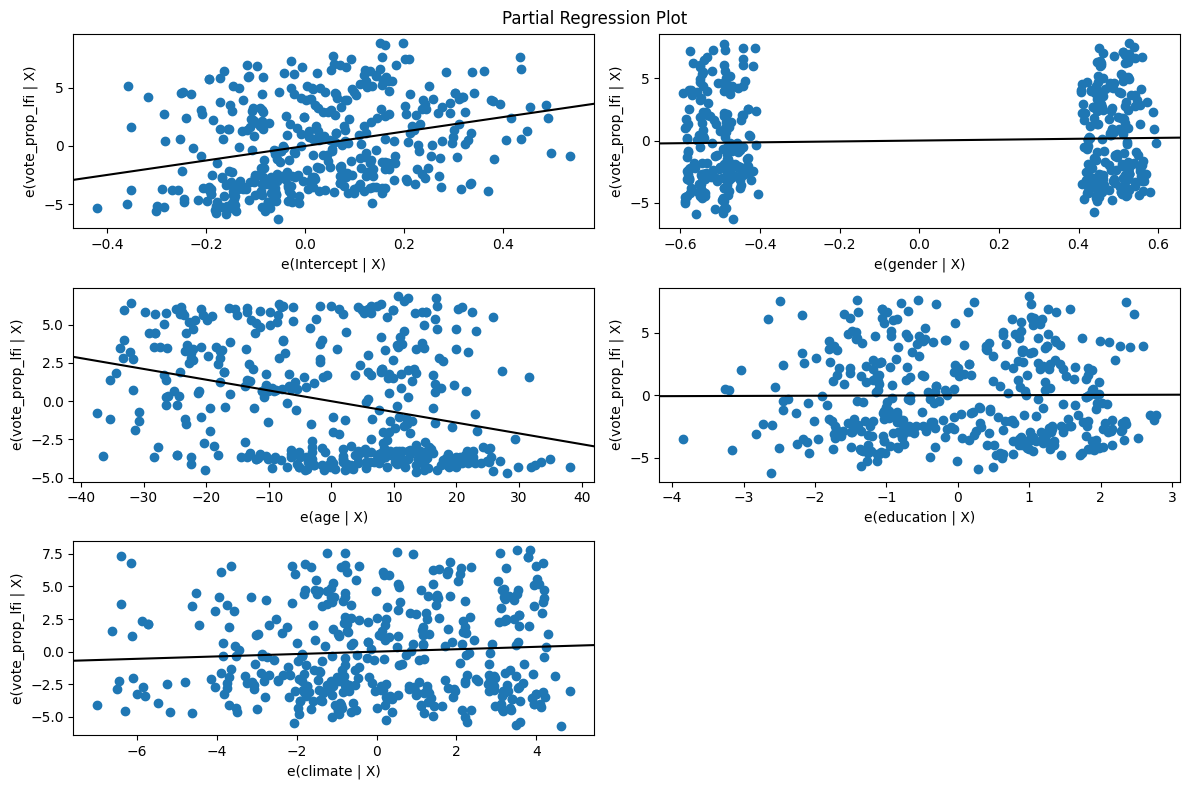

In [63]:
my_formula = "vote_prop_lfi ~  gender + age + education + climate"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('lfi_clim_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:           vote_prop_ps   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.271
Date:                Wed, 28 Jan 2026   Prob (F-statistic):             0.0610
Time:                        22:04:39   Log-Likelihood:                -1059.6
No. Observations:                 409   AIC:                             2129.
Df Residuals:                     404   BIC:                             2149.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8938      0.908      4.288      0.0

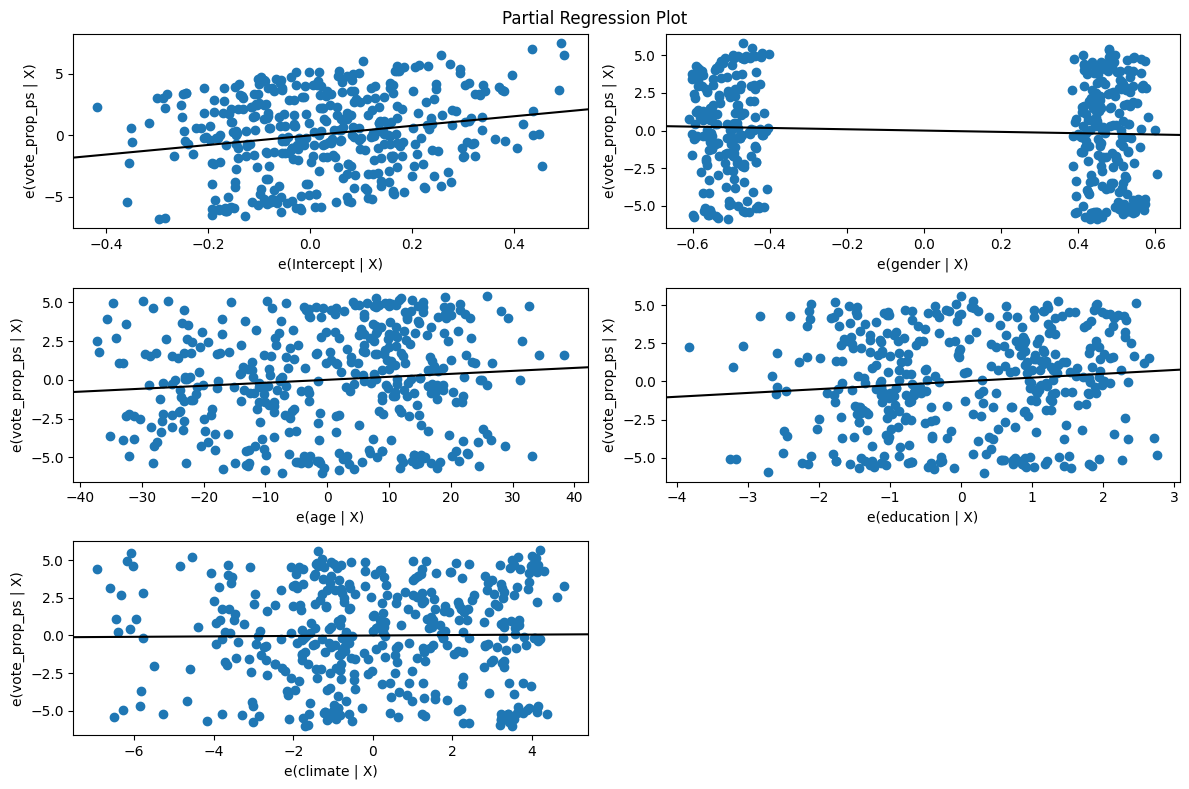

In [66]:
my_formula = "vote_prop_ps ~  gender + age + education + climate"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ps_clim_df2.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:        vote_prop_verts   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     9.031
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           5.38e-07
Time:                        22:04:48   Log-Likelihood:                -1037.9
No. Observations:                 411   AIC:                             2086.
Df Residuals:                     406   BIC:                             2106.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8859      0.848      4.583      0.0

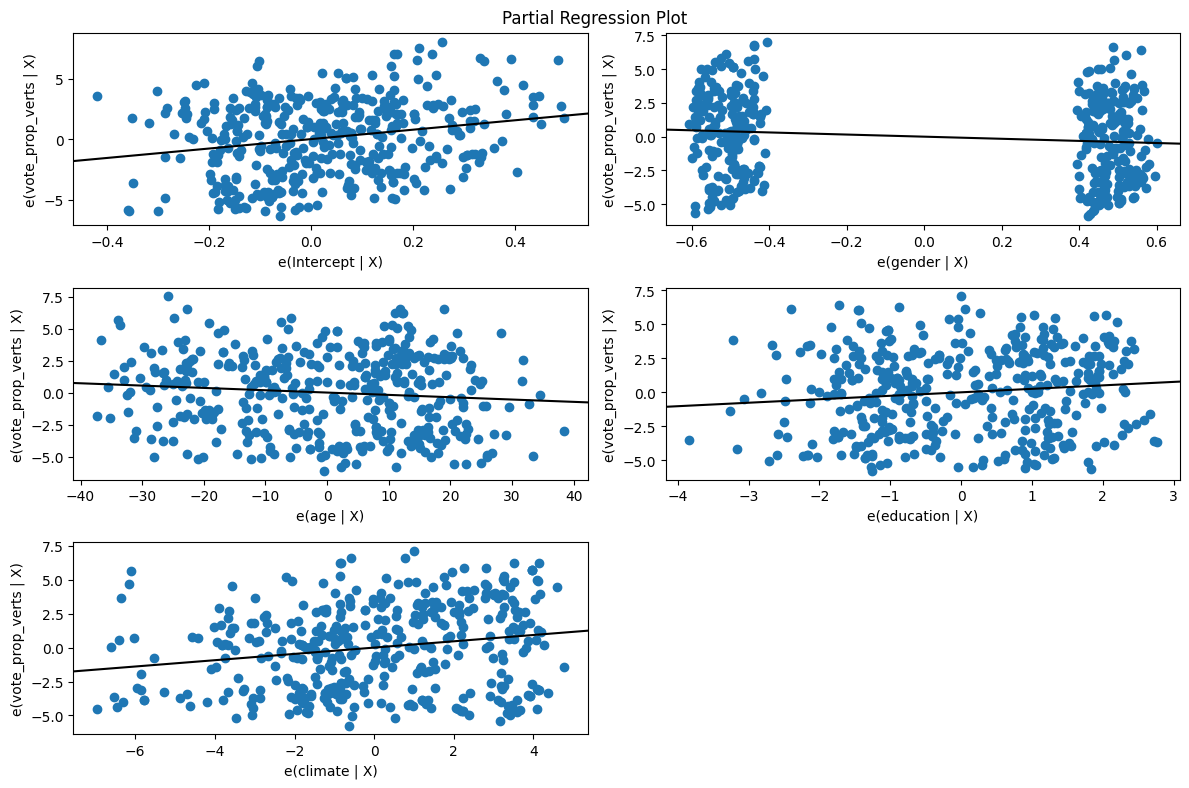

In [67]:
my_formula = "vote_prop_verts ~  gender + age + education + climate"
model = smf.ols(formula=my_formula, data=df2).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('verts_clim_df2.png', bbox_inches='tight')

In [ ]:
plt.hist(df_test[ax = "pro_ukraine"])
plt.show()

In [ ]:
df_test.plot.hist(alpha=0.5);

In [ ]:
vars_test = ["vote_prop_lfi", "vote_prop_ps", "vote_prop_verts"]

In [ ]:
df[vars_test].plot.kde()

In [ ]:
vars_test_2 = 

In [ ]:
pd.crosstab(df["vote_prop_lfi"], df["pro_ukraine"], normalize=True).plot(kind='bar', subplots=True);